In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import re
import string
from seaborn.utils import os, pd, np, plt
import seaborn as sns
from sklearn import feature_extraction as s_fex, model_selection as s_ms, metrics as s_mtr, preprocessing as s_prep
from sklearn import svm, linear_model as slm

In [2]:
from project_methods import SentimentAnalysis as proj

In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [7]:
os.listdir()

['.config', 'drive', 'sample_data']

In [8]:
fname = 'drive/MyDrive/Colab Notebooks/Applied_AI_Project/my_hotels_data.csv'
df = pd.read_csv(fname)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            8532 non-null   object 
 1   review           8532 non-null   object 
 2   topic_key_words  8532 non-null   object 
 3   opinion          8532 non-null   float64
 4   titled_reviews   8532 non-null   object 
 5   auto_labels      8532 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 400.1+ KB


In [9]:
df.columns = tuple(map(str.lower, df.columns))
df 

,title,review,topic_key_words,opinion,titled_reviews,auto_labels
0,great location,after reading some of he reviews i was worried...,great location,1.0,title: great location \nafter reading some of ...,1
1,Poor Service Overworked Staff and Bad management.,"Located near Regents Park in London, you would...",Service Staff and Bad,-1.0,title: Poor Service Overworked Staff and Bad m...,1
2,Nice hotel good value for London,We enjoyed our stay at this typical Marriott h...,Nice hotel good for,1.0,title: Nice hotel good value for London \nWe e...,1
3,A little piece of Heaven!!!,Just back from a three night break from The Lo...,A little of,-1.0,title: A little piece of Heaven!!! \nJust back...,1
4,Great Hotel close to theatre and train station,The Victoria Park Plaza was more that enjoyabl...,Great Hotel close to and station,1.0,title: Great Hotel close to theatre and train ...,1
...,...,...,...,...,...,...
8527,No complaint but no recommendation either...,I've stayed at this hotel just for a night. It...,but,-1.0,title: No complaint but no recommendation eith...,1
8528,Style triumphs over substance,Stayed at the hotel last week and wasn't as bo...,Style over,-1.0,title: Style triumphs over substance \nStayed ...,1
8529,Great bed nice decor,Stayed overnight on business. Room was on the ...,Great bed nice decor,1.0,title: Great bed nice decor \nStayed overnight...,1
8530,Overpriced 1-star dump cheated as 3-star,I stayed at the Ambassadors Earls Court in Lon...,dump as 3-star,-1.0,title: Overpriced 1-star dump cheated as 3-sta...,1


In [10]:
proj.give_percentage(df['opinion'].value_counts())

 1.0    50.28
-1.0    49.72
Name: opinion, dtype: float64

In [11]:
sns.set_style('darkgrid')

In [12]:
df.titled_reviews[0]

'title: great location \nafter reading some of he reviews i was worried about what i was letting myself n for. but i have to say i was really pleased.we were here fr a concert in the o2 so the location was perfectthe rooms were cleanplenty of nice places to eat nearby and couple of good barscheck out the cocktails at desperados great drinks and really nice staff'

In [13]:
# make lowercase and remove punctuation
df['titled_reviews'] = df['titled_reviews'].apply(proj.remove_puncs_lcase)
df['titled_reviews'].iloc[3]

"title a little piece of heaven just back from a three night break from the london marriott at grosvenor square london fri sat and sun to give you an idea of the type of person i am and what floats my boat i'm a 40 year old professional who like reasonable quality things especially good food pleasant surroundings and good mannersi was very taken with this hotel i go to london at least one a year the room my friend and i stayed in was a deluxe room no 230 it was on the second floor and was not as modern as the newly renovated rooms on the club floor however to me a hotel bedroom is for sleeping washing and storing my purchases and our room although a little small did everything it said on the tin it was clean the beds were comfortable and it had one of the better showers i've used in hotels the dcor was non offensive but having seen the pictures of the club room it did seems a little dated we were given toiletries robes slippers and it had a nice flat screen tv a good hairdryer and was 

In [14]:
df.groupby('opinion').describe().round(2)

auto_labels                                     
              count  mean   std  min  25%  50%  75%  max
opinion                                                 
-1.0         4242.0  0.36  0.93 -1.0 -1.0  1.0  1.0  1.0
 1.0         4290.0  0.91  0.42 -1.0  1.0  1.0  1.0  1.0

In [15]:
df

,title,review,topic_key_words,opinion,titled_reviews,auto_labels
0,great location,after reading some of he reviews i was worried...,great location,1.0,title great location after reading some of he ...,1
1,Poor Service Overworked Staff and Bad management.,"Located near Regents Park in London, you would...",Service Staff and Bad,-1.0,title poor service overworked staff and bad ma...,1
2,Nice hotel good value for London,We enjoyed our stay at this typical Marriott h...,Nice hotel good for,1.0,title nice hotel good value for london we enjo...,1
3,A little piece of Heaven!!!,Just back from a three night break from The Lo...,A little of,-1.0,title a little piece of heaven just back from ...,1
4,Great Hotel close to theatre and train station,The Victoria Park Plaza was more that enjoyabl...,Great Hotel close to and station,1.0,title great hotel close to theatre and train s...,1
...,...,...,...,...,...,...
8527,No complaint but no recommendation either...,I've stayed at this hotel just for a night. It...,but,-1.0,title no complaint but no recommendation eithe...,1
8528,Style triumphs over substance,Stayed at the hotel last week and wasn't as bo...,Style over,-1.0,title style triumphs over substance stayed at ...,1
8529,Great bed nice decor,Stayed overnight on business. Room was on the ...,Great bed nice decor,1.0,title great bed nice decor stayed overnight on...,1
8530,Overpriced 1-star dump cheated as 3-star,I stayed at the Ambassadors Earls Court in Lon...,dump as 3-star,-1.0,title overpriced 1star dump cheated as 3star i...,1


In [16]:
# remove stop worproj
my_stop_worproj = {'/n'}
df['titled_reviews'] = df['titled_reviews'].apply(lambda x: ' '.join([word for word in x.split() if str.lower(word) not in my_stop_worproj]))

In [17]:
df['titled_reviews'].iloc[0]

'title great location after reading some of he reviews i was worried about what i was letting myself n for but i have to say i was really pleasedwe were here fr a concert in the o2 so the location was perfectthe rooms were cleanplenty of nice places to eat nearby and couple of good barscheck out the cocktails at desperados great drinks and really nice staff'

In [18]:
doc1 = 'We shall be coming tomorrow. See you soon.'
doc2 = 'Today is a beautiful day. Thank God for life.'
doc3 = 'This is not necessarily a beautiful jewel, but we shall be paying for it.'

In [19]:
y = ['neutral', 'pleasant', 'negative']

In [20]:
cvect = s_fex.text.CountVectorizer(ngram_range=(1, 3))

In [21]:
cvect.fit([doc1, doc2, doc3])

CountVectorizer(ngram_range=(1, 3))

In [22]:
len(cvect.vocabulary_)

69

In [23]:
cvect.get_feature_names_out()

array(['be', 'be coming', 'be coming tomorrow', 'be paying',
       'be paying for', 'beautiful', 'beautiful day',
       'beautiful day thank', 'beautiful jewel', 'beautiful jewel but',
       'but', 'but we', 'but we shall', 'coming', 'coming tomorrow',
       'coming tomorrow see', 'day', 'day thank', 'day thank god', 'for',
       'for it', 'for life', 'god', 'god for', 'god for life', 'is',
       'is beautiful', 'is beautiful day', 'is not', 'is not necessarily',
       'it', 'jewel', 'jewel but', 'jewel but we', 'life', 'necessarily',
       'necessarily beautiful', 'necessarily beautiful jewel', 'not',
       'not necessarily', 'not necessarily beautiful', 'paying',
       'paying for', 'paying for it', 'see', 'see you', 'see you soon',
       'shall', 'shall be', 'shall be coming', 'shall be paying', 'soon',
       'thank', 'thank god', 'thank god for', 'this', 'this is',
       'this is not', 'today', 'today is', 'today is beautiful',
       'tomorrow', 'tomorrow see', 'tomor

In [24]:
df

,title,review,topic_key_words,opinion,titled_reviews,auto_labels
0,great location,after reading some of he reviews i was worried...,great location,1.0,title great location after reading some of he ...,1
1,Poor Service Overworked Staff and Bad management.,"Located near Regents Park in London, you would...",Service Staff and Bad,-1.0,title poor service overworked staff and bad ma...,1
2,Nice hotel good value for London,We enjoyed our stay at this typical Marriott h...,Nice hotel good for,1.0,title nice hotel good value for london we enjo...,1
3,A little piece of Heaven!!!,Just back from a three night break from The Lo...,A little of,-1.0,title a little piece of heaven just back from ...,1
4,Great Hotel close to theatre and train station,The Victoria Park Plaza was more that enjoyabl...,Great Hotel close to and station,1.0,title great hotel close to theatre and train s...,1
...,...,...,...,...,...,...
8527,No complaint but no recommendation either...,I've stayed at this hotel just for a night. It...,but,-1.0,title no complaint but no recommendation eithe...,1
8528,Style triumphs over substance,Stayed at the hotel last week and wasn't as bo...,Style over,-1.0,title style triumphs over substance stayed at ...,1
8529,Great bed nice decor,Stayed overnight on business. Room was on the ...,Great bed nice decor,1.0,title great bed nice decor stayed overnight on...,1
8530,Overpriced 1-star dump cheated as 3-star,I stayed at the Ambassadors Earls Court in Lon...,dump as 3-star,-1.0,title overpriced 1star dump cheated as 3star i...,1


AttributeError: ignored

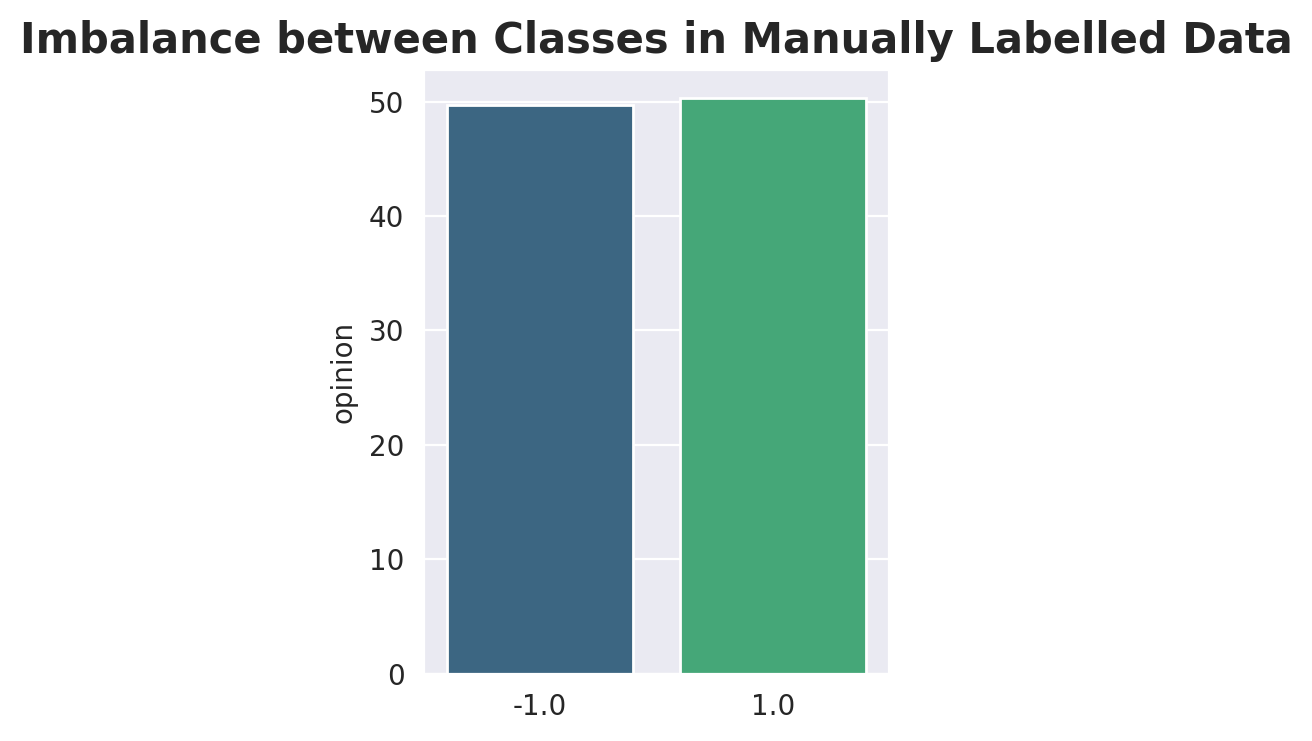

In [25]:
freq = (100 * df.opinion.value_counts()/len(df)).round(2)
freq

proj.plot_column(freq.index, freq, figsize=(3, 4), plot_title='Imbalance between Classes in Manually Labelled Data', ylim=(0, 75),)
labe = f"% Count\n------------\nPositive: {freq[1]}\nNegative: {freq[-1]}"
plt.text(-0.25, 60, labe, size=6,  
         fontdict={'color': 'blue'},
         bbox={'edgecolor':'red',
              'facecolor': 'white'})

AttributeError: ignored

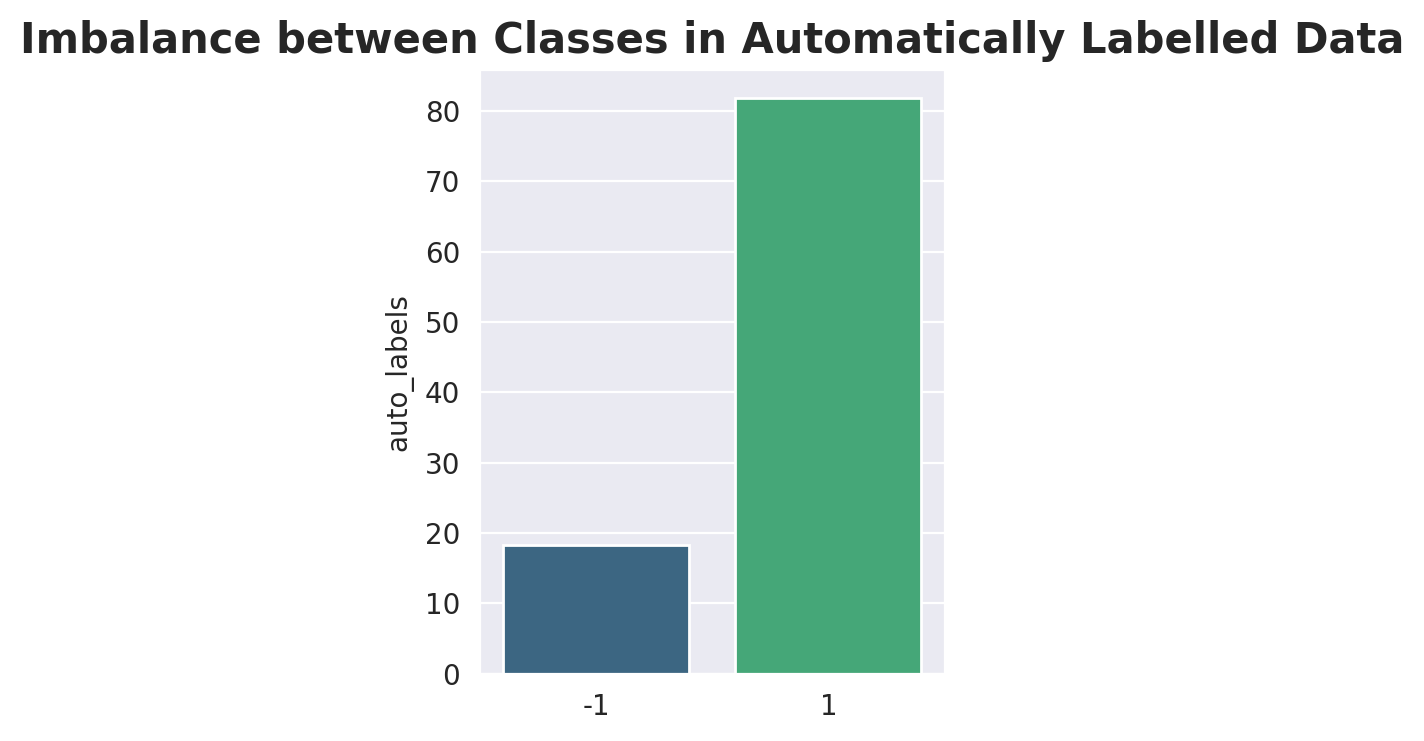

In [26]:
freq = (100 * df.auto_labels.value_counts()/len(df)).round(2)
freq

proj.plot_column(freq.index, freq, figsize=(3, 4), plot_title='Imbalance between Classes in Automatically Labelled Data', ylim=(0, 75),)
labe = f"% Count\n------------\nPositive: {freq[1]}\nNegative: {freq[-1]}"
plt.text(-0.25, 60, labe, size=6,  
         fontdict={'color': 'blue'},
         bbox={'edgecolor':'red',
              'facecolor': 'white'})

In [27]:
X = df['titled_reviews']
y = df['opinion']

In [26]:
X_train, X_test, y_train, y_test = s_ms.train_test_split(X, y, test_size=0.25, random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(6399,)
(2133,)
(2133,)


In [28]:
cw = proj.compute_balanced_weights(y_train, as_samp_weights=False)
cw

{-1.0: 1.0039221838719798, 1.0: 0.9961083437110835}

In [29]:
cvect = s_fex.text.CountVectorizer(ngram_range=(1, 3))

In [30]:
sc_xtrain = cvect.fit_transform(X_train)
sc_xtest = cvect.transform(X_test)

In [31]:
display(sc_xtest.shape, sc_xtrain.shape, sc_xtrain[0])

(2133, 1136301)

(6399, 1136301)

<1x1136301 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [32]:
svm_clf = svm.SVC(class_weight=cw)

In [33]:
svm_clf.fit(sc_xtrain, y_train,)

SVC(class_weight={-1.0: 1.0039221838719798, 1.0: 0.9961083437110835})

In [34]:
test_preproj = svm_clf.predict(sc_xtest)

Test set Evaluation
              precision    recall  f1-score   support

        -1.0       0.81      0.85      0.83      1055
         1.0       0.84      0.81      0.83      1078

    accuracy                           0.83      2133
   macro avg       0.83      0.83      0.83      2133
weighted avg       0.83      0.83      0.83      2133



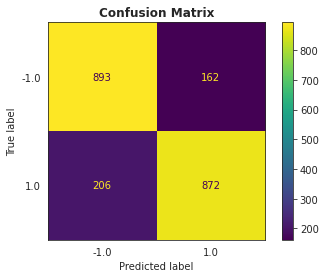

In [35]:
print('Test set Evaluation')
print(proj.report_with_conf_matrix(y_test, test_preproj))

## DEEP LEARNING APPROACH

In [28]:
from tensorflow.keras import utils as k_utils, metrics as k_mtr, backend as K, optimizers, models, layers, losses
from nltk import corpus
from tensorflow.keras import preprocessing as k_prep, callbacks

In [29]:
def nltk_wtokens(ser: pd.Series):
    from nltk import tokenize
    return ser.apply(tokenize.word_tokenize)

In [30]:
X = df['titled_reviews']
y = df['opinion']

In [31]:
# convert sentences to list of worproj
sentence_to_worprojlist = ' '.join(X.to_list()).split()
# include token for unknown/unrecognised worproj
sentence_to_worprojlist.append('<UNK>')

In [32]:
display(len(sentence_to_worprojlist), sentence_to_worprojlist)

1737729

['title',
 'great',
 'location',
 'after',
 'reading',
 'some',
 'of',
 'he',
 'reviews',
 'i',
 'was',
 'worried',
 'about',
 'what',
 'i',
 'was',
 'letting',
 'myself',
 'n',
 'for',
 'but',
 'i',
 'have',
 'to',
 'say',
 'i',
 'was',
 'really',
 'pleasedwe',
 'were',
 'here',
 'fr',
 'a',
 'concert',
 'in',
 'the',
 'o2',
 'so',
 'the',
 'location',
 'was',
 'perfectthe',
 'rooms',
 'were',
 'cleanplenty',
 'of',
 'nice',
 'places',
 'to',
 'eat',
 'nearby',
 'and',
 'couple',
 'of',
 'good',
 'barscheck',
 'out',
 'the',
 'cocktails',
 'at',
 'desperados',
 'great',
 'drinks',
 'and',
 'really',
 'nice',
 'staff',
 'title',
 'poor',
 'service',
 'overworked',
 'staff',
 'and',
 'bad',
 'management',
 'located',
 'near',
 'regents',
 'park',
 'in',
 'london',
 'you',
 'would',
 'expect',
 'at',
 'least',
 '1',
 'english',
 'speaking',
 'receptionist',
 "don't",
 'expect',
 'that',
 'in',
 'this',
 'hotel',
 'the',
 'breakfast',
 'room',
 'was',
 'full',
 'and',
 'even',
 'thou',
 '

In [33]:
vocab_to_int, int_to_vocab = proj.create_lookup(sentence_to_worprojlist)

In [34]:
X_train, X_other, y_train, y_other = s_ms.train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = s_ms.train_test_split(X_other, y_other, test_size=0.4, random_state=1)

In [35]:
print(y.shape[0])
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)

8532
(5972,)
(1536,)
(1024,)


In [36]:
# integer encoding of X_train and X_test
X_train_encoded = proj.convert_to_integer(X_train, vocab_to_int)
X_test_encoded = proj.convert_to_integer(X_test, vocab_to_int)
X_val_encoded = proj.convert_to_integer(X_val, vocab_to_int)

In [37]:
print(list(map(len, X_train_encoded[:20])))
print(list(map(len, X_test_encoded[:10])))

[182, 80, 154, 190, 331, 18, 180, 147, 60, 296, 199, 153, 58, 114, 268, 244, 156, 72, 65, 274]
[137, 379, 70, 415, 126, 342, 281, 221, 76, 179]


In [38]:
encoder = s_prep.OneHotEncoder()
encoder.fit(np.expand_dims(y_train, 1))

OneHotEncoder()

In [39]:
y_train_encoded = encoder.fit_transform(np.expand_dims(y_train, 1)).toarray()
y_test_encoded = encoder.fit_transform(np.expand_dims(y_test, 1)).toarray()
y_val_encoded = encoder.fit_transform(np.expand_dims(y_val, 1)).toarray()

In [43]:
display(y_train_encoded[:10], y_train[:10])

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

1114    1.0
3470    1.0
6391   -1.0
1584   -1.0
6876   -1.0
1766    1.0
5668    1.0
870     1.0
3290   -1.0
4249   -1.0
Name: opinion, dtype: float64

In [44]:
vocab_size = len(vocab_to_int)  
max_sentence_len = proj.get_maximum_len(X_train_encoded, X_test_encoded)
embedding_vector_len = 300
dropout = 0.5
print(vocab_size, max_sentence_len, embedding_vector_len, dropout)

45457 1621 300 0.5


In [45]:
X_train_padded = k_prep.sequence.pad_sequences(X_train_encoded, maxlen=max_sentence_len)
X_val_padded = k_prep.sequence.pad_sequences(X_val_encoded, maxlen=max_sentence_len)
X_test_padded = k_prep.sequence.pad_sequences(X_test_encoded, maxlen=max_sentence_len)

In [46]:
sw = proj.compute_balanced_weights(y_train, as_samp_weights=True)
sw

array([1.00167729, 1.00167729, 0.99832832, ..., 1.00167729, 1.00167729,
       0.99832832])

In [127]:
def build_rnn(vocab_size, embedding_vector_len, max_sentence_len, dropout, labels, output_actvn='softmax',
              gru_cells=128, optimizer='adam', loss_func='categorical_crossentropy', mtr='accuracy'):
    """input_dim: total number of unique worproj (int)
    output_dim: shape of the embedding output vector 
    input_length: fixed length of padded input sequence (list of ints)"""
    
    K.clear_session()

    model = models.Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_vector_len, input_length=max_sentence_len))
    model.add(layers.GRU(gru_cells, dropout=dropout,))# return_sequences=True)))
    # model.add(layers.GRU(32, dropout=dropout, recurrent_dropout=0.0))

    model.add(layers.Dense(len(labels), activation=output_actvn))

    model.compile(optimizer=optimizer, loss=loss_func, metrics=mtr)
    print(model.summary())
    return model

In [128]:
drop_out = 0.5
gru = build_rnn(vocab_size=vocab_size, embedding_vector_len=embedding_vector_len, 
                max_sentence_len=max_sentence_len, gru_cells=128,
               dropout=drop_out, labels=[-1, 1], loss_func='binary_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1621, 300)         13637100  
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 13,802,478
Trainable params: 13,802,478
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
proj.show_layer_shapes(gru)

Layer 0: 
Input_shape: (None, 1621)
Output shape: (None, 1621, 300)


Layer 1: 
Input_shape: (None, 1621, 300)
Output shape: (None, 256)


Layer 2: 
Input_shape: (None, 256)
Output shape: (None, 2)




In [88]:
# monitor = callbacks.EarlyStopping(monitor='val_loss', min_delta=1.e-3, patience=2, verbose=1)
fname = os.path.join(my_pkg, 'best_model.hdf5')
checkpoint = callbacks.ModelCheckpoint(filepath=fname, save_best_only=True)

In [89]:
gru.fit(X_train_padded, y_train_encoded, validation_data=[X_val_padded, y_val_encoded], 
        epochs=10, sample_weight=sw,
        callbacks=[checkpoint], batch_size=128)

Epoch 1/10
47/47 [==============================] - 49s 989ms/step - loss: 0.6820 - accuracy: 0.5615 - val_loss: 0.6665 - val_accuracy: 0.5586
Epoch 2/10
47/47 [==============================] - 49s 1s/step - loss: 0.5935 - accuracy: 0.7004 - val_loss: 0.6245 - val_accuracy: 0.7103
Epoch 3/10
47/47 [==============================] - 46s 990ms/step - loss: 0.4296 - accuracy: 0.8002 - val_loss: 0.5746 - val_accuracy: 0.7285
Epoch 4/10
47/47 [==============================] - 45s 966ms/step - loss: 0.2739 - accuracy: 0.8903 - val_loss: 0.7156 - val_accuracy: 0.6673
Epoch 5/10
47/47 [==============================] - 45s 966ms/step - loss: 0.2636 - accuracy: 0.8937 - val_loss: 0.7611 - val_accuracy: 0.6797
Epoch 6/10
47/47 [==============================] - 45s 961ms/step - loss: 0.1322 - accuracy: 0.9519 - val_loss: 0.8559 - val_accuracy: 0.7344
Epoch 7/10
47/47 [==============================] - 47s 1s/step - loss: 0.1013 - accuracy: 0.9657 - val_loss: 0.9439 - val_accuracy: 0.7096
Epoch

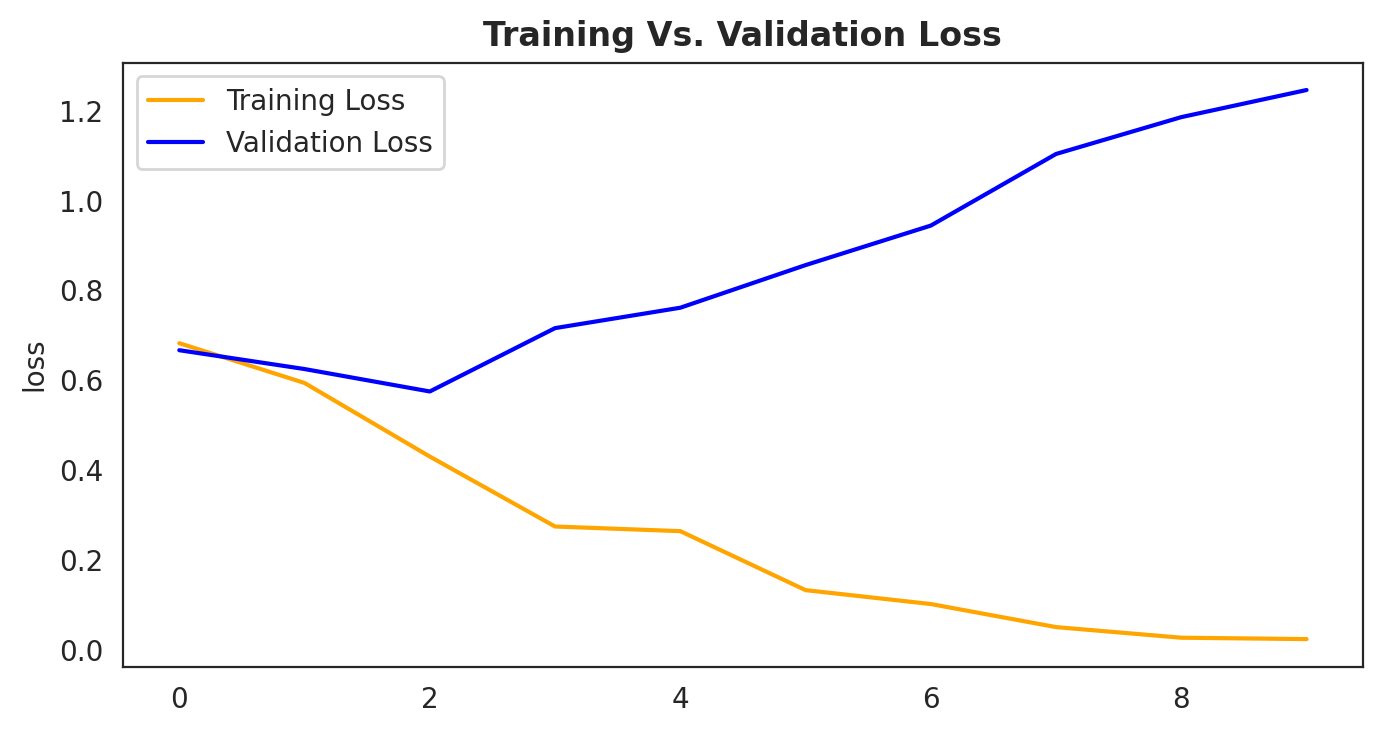

In [90]:
report = pd.DataFrame(gru.history.history)
ax1 = proj.plot_line(report.index, report['loss'], legend_labe='Training Loss', color='orange')
proj.plot_line(report.index, report['val_loss'], plot_title='Training Vs. Validation Loss',
              legend_labe='Validation Loss', color='blue', axis=ax1)
plt.legend()

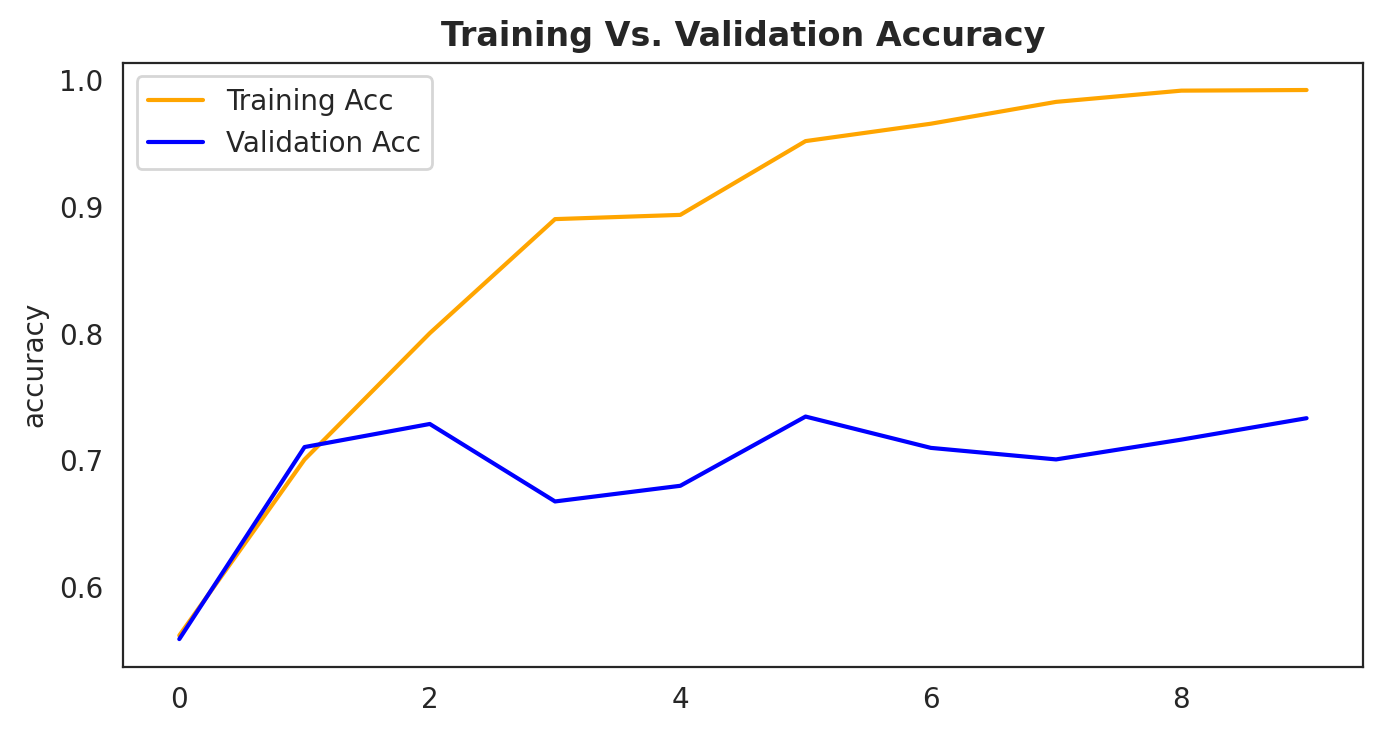

In [91]:
report = pd.DataFrame(gru.history.history)
ax1 = proj.plot_line(report.index, report['accuracy'], legend_labe='Training Acc', color='orange')
proj.plot_line(report.index, report['val_accuracy'], plot_title='Training Vs. Validation Accuracy',
              legend_labe='Validation Acc', color='blue', axis=ax1)
plt.legend()

In [92]:
preproj = gru.predict(X_val_padded)
display(preproj.shape, y_val.shape, y_val_encoded)

(1536, 2)

(1536,)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [93]:
test_preproj = pd.Series(np.argmax(preproj, axis=1)).apply(lambda x: -1 if x == 0 else 1)
test_preproj

0       1
1       1
2       1
3      -1
4      -1
       ..
1531    1
1532    1
1533    1
1534   -1
1535    1
Length: 1536, dtype: int64

Test set Evaluation
              precision    recall  f1-score   support

        -1.0       0.76      0.68      0.72       761
         1.0       0.71      0.79      0.75       775

    accuracy                           0.73      1536
   macro avg       0.74      0.73      0.73      1536
weighted avg       0.74      0.73      0.73      1536



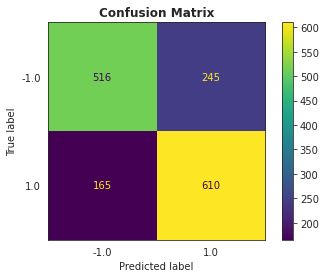

In [94]:
print('Test set Evaluation')
print(proj.report_with_conf_matrix(y_val, test_preproj))

HYPERPARAMETER TUNNG

In [148]:
drop_out = 0.85
lr = 2.8e-4
gru_cells = 128
gru = build_rnn(vocab_size=vocab_size, embedding_vector_len=embedding_vector_len, 
                max_sentence_len=max_sentence_len, gru_cells=gru_cells,
                optimizer=optimizers.RMSprop(learning_rate=lr),
               dropout=drop_out, labels=[-1, 1], loss_func='binary_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1621, 300)         13637100  
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 13,802,478
Trainable params: 13,802,478
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
proj.show_layer_shapes(gru)

Layer 0: 
Input_shape: (None, 1621)
Output shape: (None, 1621, 300)


Layer 1: 
Input_shape: (None, 1621, 300)
Output shape: (None, 128)


Layer 2: 
Input_shape: (None, 128)
Output shape: (None, 2)




In [150]:
monitor = callbacks.EarlyStopping(monitor='val_accuracy', min_delta=1.e-3, patience=3, verbose=1)
fname = os.path.join(my_pkg, 'best_model.hdf5')
checkpoint = callbacks.ModelCheckpoint(filepath=fname, save_best_only=True)

In [151]:
batchsize = 64
gru.fit(X_train_padded, y_train_encoded, validation_data=[X_val_padded, y_val_encoded],
        epochs=20, sample_weight=sw,
        callbacks=[monitor, checkpoint], batch_size=batchsize)

Epoch 1/20
94/94 [==============================] - 43s 419ms/step - loss: 0.6900 - accuracy: 0.5454 - val_loss: 0.6857 - val_accuracy: 0.5866
Epoch 2/20
94/94 [==============================] - 39s 413ms/step - loss: 0.6746 - accuracy: 0.6236 - val_loss: 0.6245 - val_accuracy: 0.6842
Epoch 3/20
94/94 [==============================] - 41s 439ms/step - loss: 0.5838 - accuracy: 0.7192 - val_loss: 0.5513 - val_accuracy: 0.7285
Epoch 4/20
94/94 [==============================] - 39s 413ms/step - loss: 0.5269 - accuracy: 0.7631 - val_loss: 0.4803 - val_accuracy: 0.7767
Epoch 5/20
94/94 [==============================] - 39s 413ms/step - loss: 0.4506 - accuracy: 0.8074 - val_loss: 0.4774 - val_accuracy: 0.7923
Epoch 6/20
94/94 [==============================] - 40s 428ms/step - loss: 0.4373 - accuracy: 0.8202 - val_loss: 0.4949 - val_accuracy: 0.7708
Epoch 7/20
94/94 [==============================] - 39s 413ms/step - loss: 0.3912 - accuracy: 0.8414 - val_loss: 0.4081 - val_accuracy: 0.8275

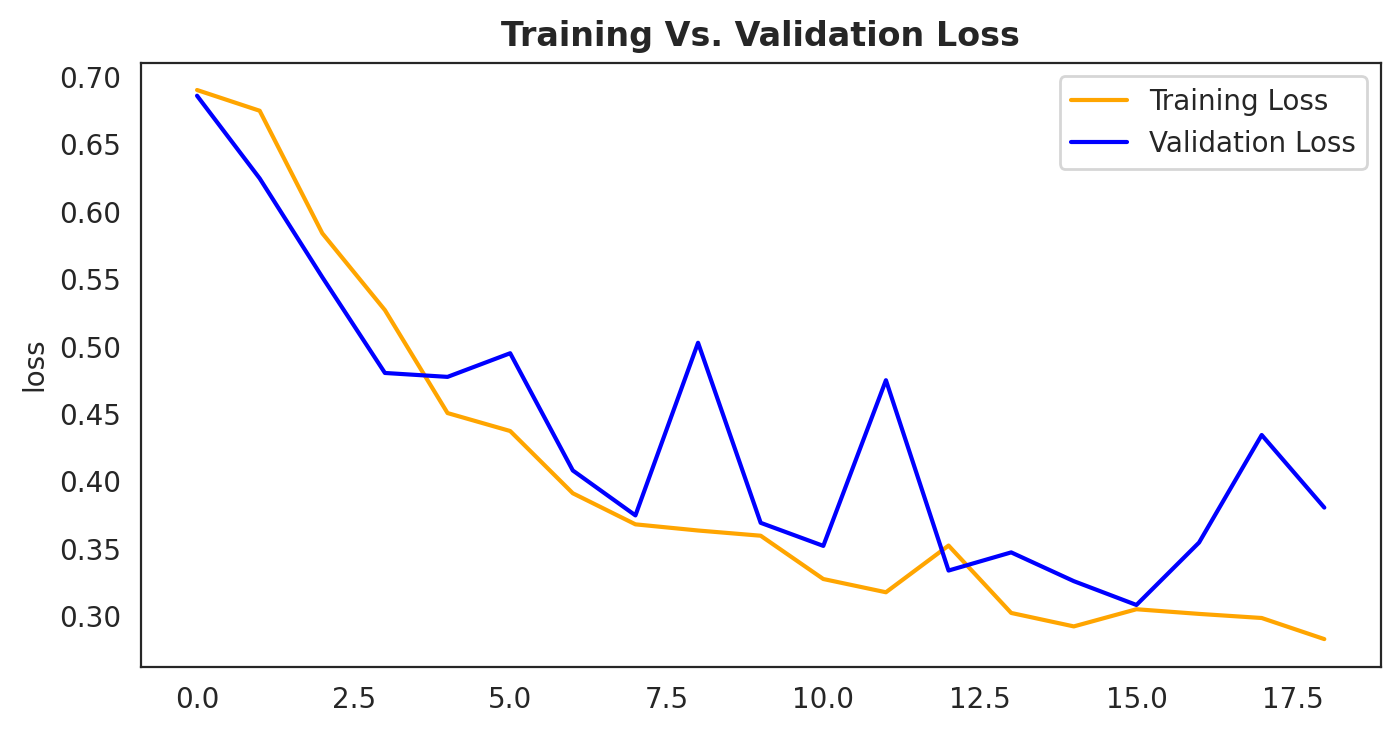

In [152]:
report = pd.DataFrame(gru.history.history)
ax1 = proj.plot_line(report.index, report['loss'], legend_labe='Training Loss', color='orange')
proj.plot_line(report.index, report['val_loss'], plot_title='Training Vs. Validation Loss',
              legend_labe='Validation Loss', color='blue', axis=ax1)
plt.legend()

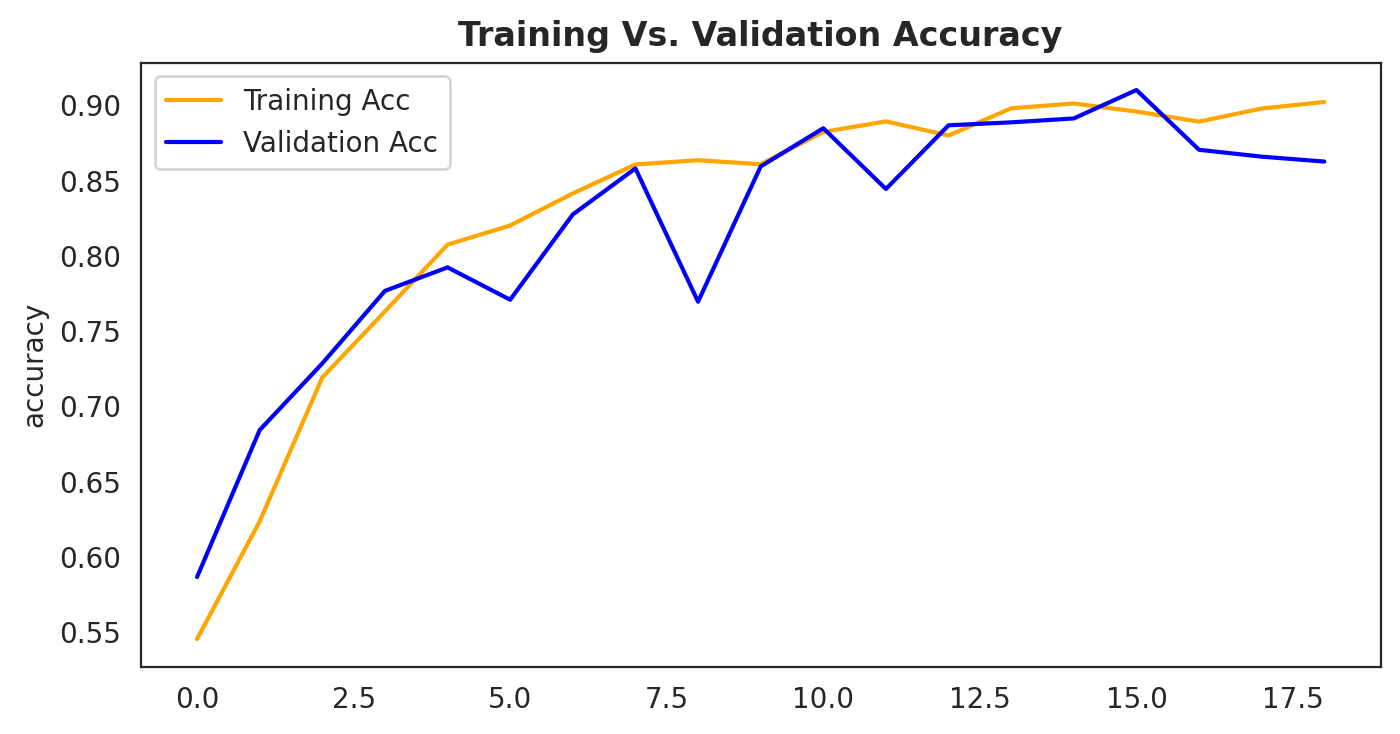

In [153]:
report = pd.DataFrame(gru.history.history)
ax1 = proj.plot_line(report.index, report['accuracy'], legend_labe='Training Acc', color='orange')
proj.plot_line(report.index, report['val_accuracy'], plot_title='Training Vs. Validation Accuracy',
              legend_labe='Validation Acc', color='blue', axis=ax1)
plt.legend()

In [154]:
preproj = gru.predict(X_val_padded)
display(preproj.shape, y_val.shape, y_val_encoded.shape)

(1536, 2)

(1536,)

(1536, 2)

In [155]:
test_preproj = pd.Series(np.argmax(preproj, axis=1)).apply(lambda x: -1 if x == 0 else 1)
test_preproj

0       1
1      -1
2       1
3      -1
4       1
       ..
1531   -1
1532    1
1533    1
1534   -1
1535   -1
Length: 1536, dtype: int64

Test set Evaluation
              precision    recall  f1-score   support

        -1.0       0.90      0.82      0.85       761
         1.0       0.83      0.91      0.87       775

    accuracy                           0.86      1536
   macro avg       0.87      0.86      0.86      1536
weighted avg       0.87      0.86      0.86      1536



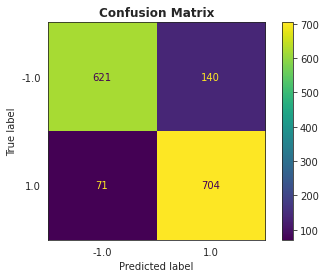

In [156]:
print('Test set Evaluation')
print(proj.report_with_conf_matrix(y_val, test_preproj))

In [157]:
gru.load_weights(fname)

In [158]:
preproj = gru.predict(X_test_padded)
display(preproj.shape, y_test.shape, y_test_encoded.shape)

(1024, 2)

(1024,)

(1024, 2)

In [159]:
test_preproj = pd.Series(np.argmax(preproj, axis=1)).apply(lambda x: -1 if x == 0 else 1)
test_preproj

0       1
1       1
2      -1
3      -1
4       1
       ..
1019    1
1020    1
1021    1
1022   -1
1023    1
Length: 1024, dtype: int64

Test set Evaluation
              precision    recall  f1-score   support

        -1.0       0.90      0.91      0.90       490
         1.0       0.91      0.90      0.91       534

    accuracy                           0.91      1024
   macro avg       0.91      0.91      0.91      1024
weighted avg       0.91      0.91      0.91      1024



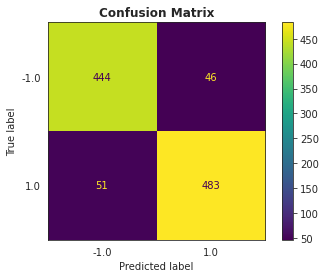

In [161]:
print('Test set Evaluation')
print(proj.report_with_conf_matrix(y_test, test_preproj))

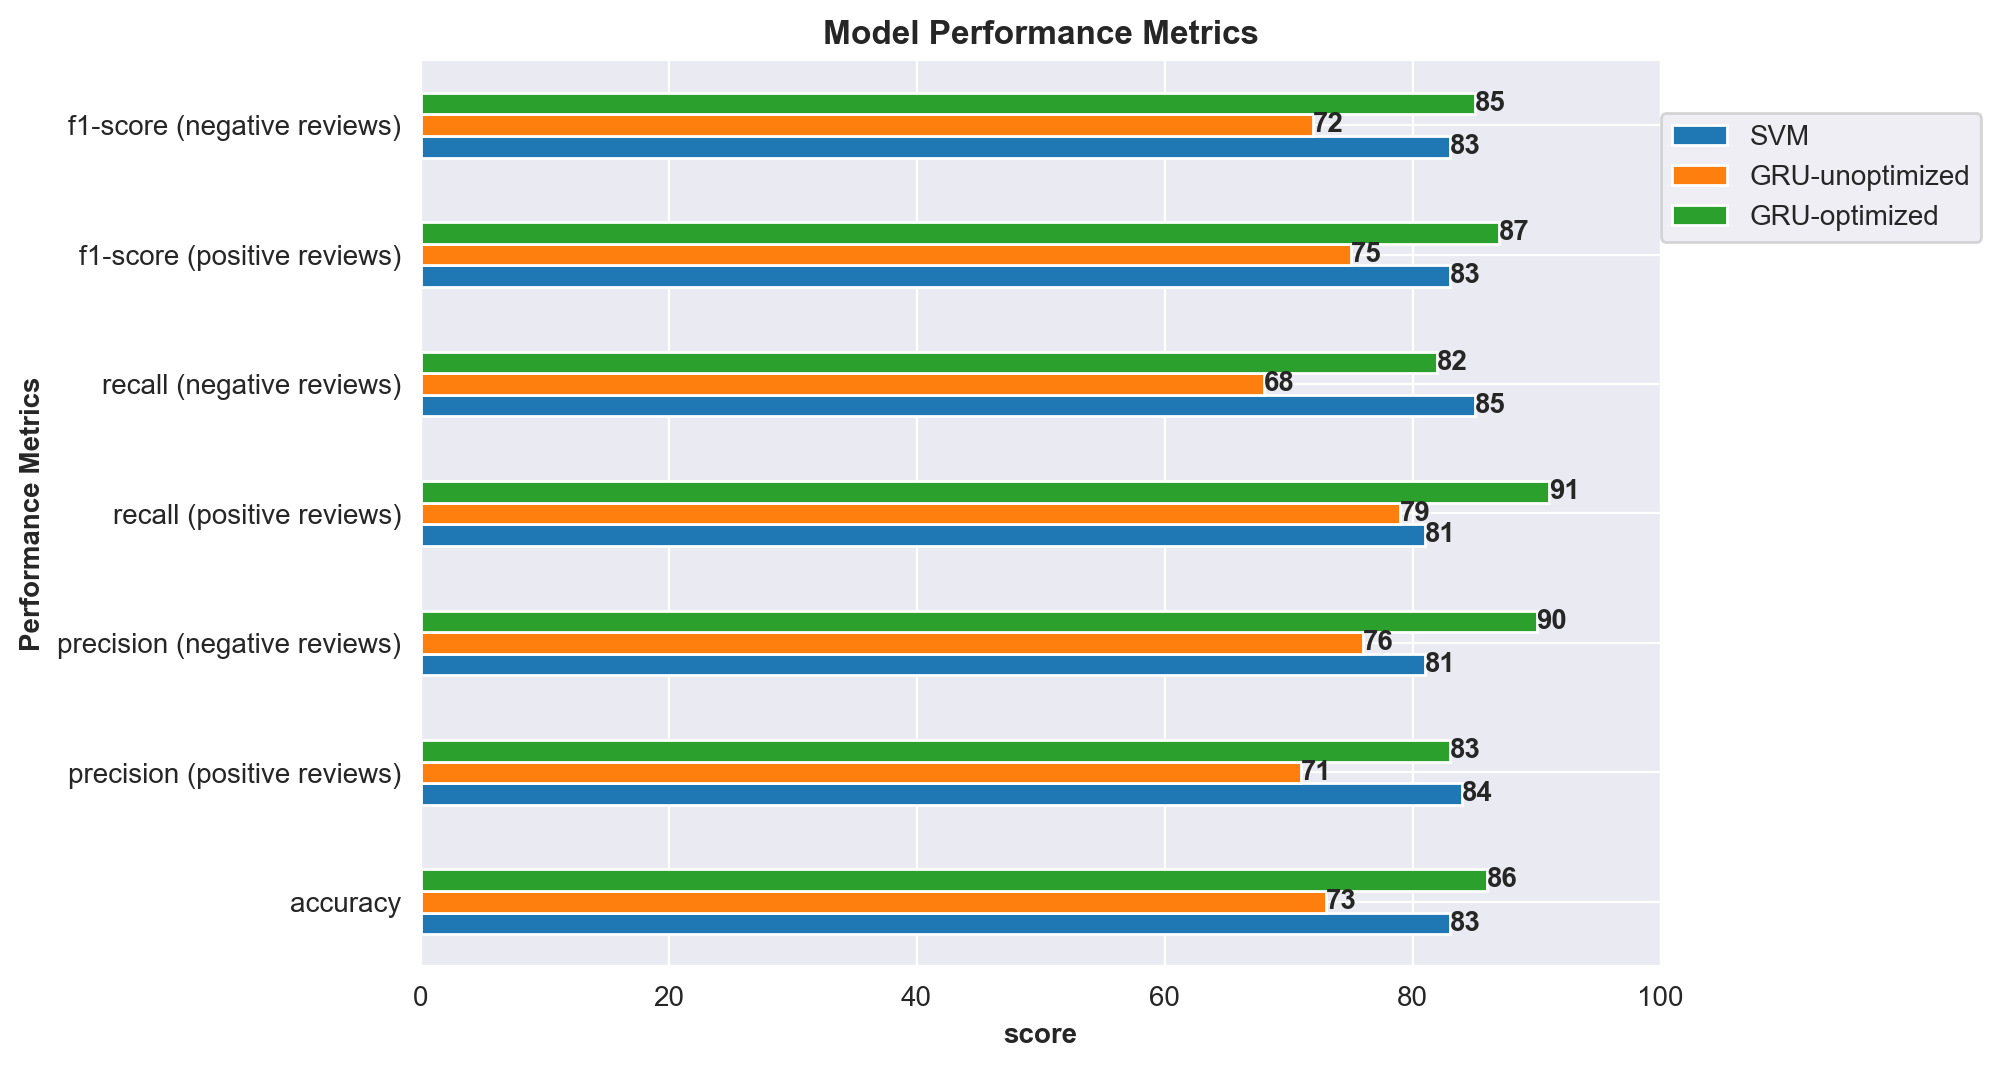

In [4]:
sns.set_style('darkgrid')
metrics = {'index': ['accuracy', 'precision (positive reviews)', 'precision (negative reviews)',
              'recall (positive reviews)', 'recall (negative reviews)',
              'f1-score (positive reviews)', 'f1-score (negative reviews)'],
        'SVM': [83, 84, 81, 81, 85, 83, 83],
        'GRU-unoptimized': [73, 71, 76, 79, 68, 75, 72],
        'GRU-optimized': [86, 83, 90, 91, 82, 87, 85]}

perf_mtr = pd.DataFrame(metrics,)# index='index')
perf_mtr

perf_mtr = perf_mtr.set_index('index')
perf_mtr

fig, ax1 = plt.subplots(figsize=(8, 6), dpi=200)
perf_mtr.plot(kind='barh', ax=ax1)
ax1.set_xlim(right=100)
sns.move_legend(ax1, [1, 0.8])
ax1.set_ylabel('Performance Metrics', weight='bold'), ax1.set_xlabel('score', weight='bold')
ax1.set_title('Model Performance Metrics', weight='bold')
for i in range(len(ax1.containers)):
    ax1.bar_label(container=ax1.containers[i], weight='bold')# xy=(patch.get_height(), patch.get_x()))
# ax1.set_yticklabels(labels=ax1.get_yticklabels(), rotation=60)
ax1.get_figure().savefig('perf_metrics.png', bbox_inches='tight', dpi=200)